# Version Control
Check and display versions for future reproduction and debugging purposes

In [1]:
import pandas as pd
import sklearn
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.5.5.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.1
pytest: 3.6.2
pip: 18.0
setuptools: 39.2.0
Cython: 0.28.3
numpy: 1.14.5
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: 1.7.5
patsy: 0.5.0
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.5
feather: None
matplotlib: 2.2.2
openpyxl: 2.5.4
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.5
lxml: 4.2.2
bs4: 4.6.0
html5lib: 1.0.1
sqlalchemy: 1.2.8
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [2]:
raw_df = pd.read_csv('data/crimedata.csv')
processed_df = raw_df.replace('?',np.nan)
processed_df.tail()

,Ecommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
2210,Mercedcity,CA,NaN,NaN,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,NaN,NaN,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,NaN,NaN,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,NaN,NaN,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87
2214,WestSacramentocity,CA,NaN,NaN,10,28898,2.61,2.39,71.27,9.09,...,791,2614.53,1458,4819.2,405,1338.67,20,66.11,918.89,8838.5


In [3]:
processed_df.groupby('Ecommunityname')['Ecommunityname'].count()

Ecommunityname
Aberdeencity          2
Aberdeentown          1
Aberdeentownship      1
Adacity               1
Adriancity            1
AgouraHillscity       1
Aikencity             1
Akroncity             1
Alabastercity         1
Alamedacity           1
Alamogordocity        1
Albanycity            4
Albemarlecity         1
AlbertLeacity         1
Albioncity            1
Albuquerquecity       1
AlexanderCitycity     1
Alexandriacity        2
Algonquinvillage      1
Alhambracity          1
Alicecity             1
AllenParkcity         1
Allencity             1
Allentowncity         1
Alliancecity          1
Alpenacity            1
Alpharettacity        1
Altoonacity           1
Altuscity             1
Alvincity             1
                     ..
Woburncity            1
Wolcotttown           1
Woodbridgetownship    1
Woodburncity          1
Woodburycity          2
Woodhavencity         1
Woodlandcity          1
Woodwardcity          1
Woonsocketcity        1
Woostercity           1
W

In [4]:
processed_df.groupby('state')['state'].count()

state
AK      3
AL     43
AR     25
AZ     20
CA    279
CO     25
CT     71
DC      1
DE      1
FL     90
GA     37
IA     20
ID      7
IL     40
IN     48
KS      1
KY     26
LA     22
MA    123
MD     12
ME     17
MI    108
MN     66
MO     42
MS     20
NC     46
ND      8
NH     21
NJ    211
NM     10
NV      5
NY     46
OH    111
OK     36
OR     31
PA    101
RI     26
SC     28
SD      9
TN     35
TX    162
UT     24
VA     33
VT      4
WA     40
WI     60
WV     14
WY      7
Name: state, dtype: int64

# Explore Variables

- 147 features exist, both predictive features and features to be predicted
- 2215 observations exist
- Some features already have missing values

Let's take a further analysis into some of the missing values

In [5]:
for col in processed_df.columns:
    print(col+': '+str(processed_df[col].count()))

Ecommunityname: 2215
state: 2215
countyCode: 994
communityCode: 991
fold: 2215
population: 2215
householdsize: 2215
racepctblack: 2215
racePctWhite: 2215
racePctAsian: 2215
racePctHisp: 2215
agePct12t21: 2215
agePct12t29: 2215
agePct16t24: 2215
agePct65up: 2215
numbUrban: 2215
pctUrban: 2215
medIncome: 2215
pctWWage: 2215
pctWFarmSelf: 2215
pctWInvInc: 2215
pctWSocSec: 2215
pctWPubAsst: 2215
pctWRetire: 2215
medFamInc: 2215
perCapInc: 2215
whitePerCap: 2215
blackPerCap: 2215
indianPerCap: 2215
AsianPerCap: 2215
OtherPerCap: 2214
HispPerCap: 2215
NumUnderPov: 2215
PctPopUnderPov: 2215
PctLess9thGrade: 2215
PctNotHSGrad: 2215
PctBSorMore: 2215
PctUnemployed: 2215
PctEmploy: 2215
PctEmplManu: 2215
PctEmplProfServ: 2215
PctOccupManu: 2215
PctOccupMgmtProf: 2215
MalePctDivorce: 2215
MalePctNevMarr: 2215
FemalePctDiv: 2215
TotalPctDiv: 2215
PersPerFam: 2215
PctFam2Par: 2215
PctKids2Par: 2215
PctYoungKids2Par: 2215
PctTeen2Par: 2215
PctWorkMomYoungKids: 2215
PctWorkMom: 2215
NumKidsBornNeverM

In [6]:
# drop columns with less than ~25% of observations
for col in processed_df.columns:
    if processed_df[col].count() < 500:
        del processed_df[col]
        
# ignore columns with datatype of string      
# or any column with no predictive power
del processed_df['Ecommunityname']
del processed_df['state']
del processed_df['countyCode']
del processed_df['communityCode']
del processed_df['fold']
del processed_df['OtherPerCap']

# ignore features to predict for future reference
del processed_df['rapes']
del processed_df['rapesPerPop']
del processed_df['robberies']
del processed_df['robbbPerPop']
del processed_df['assaults']
del processed_df['assaultPerPop']
del processed_df['burglaries']
del processed_df['burglPerPop']
del processed_df['larcenies']
del processed_df['larcPerPop']
del processed_df['autoTheft']
del processed_df['autoTheftPerPop']
del processed_df['arsons']
del processed_df['arsonsPerPop']
del processed_df['nonViolPerPop']

# for now, we will just look at violent crimes
# drop any missing observations from y and its corresponding X
processed_df = processed_df[processed_df['ViolentCrimesPerPop'].isnull() == False]
y = processed_df['ViolentCrimesPerPop']
del processed_df['ViolentCrimesPerPop']

print('Features remaining: '+str(len(processed_df.columns)))

Features remaining: 103


## Organize Feature Groups

Despite eliminating a few features, there still exists more features than is 
necessary for analysis.

Let's eliminate more features by first selecting the most predictive features. 

More feature groups will be created based on the top features, as well
as the top features mentioned by the paper.

In [7]:
all_features = processed_df.columns

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction via chi squared test
test = SelectKBest(score_func=chi2, k=30)
fit = test.fit(processed_df, y)

# organize top features into a list
d = dict(zip(processed_df.columns, fit.scores_))
top_features = sorted(d, key=d.__getitem__, reverse=True)[0:30]
print(top_features)

['numbUrban', 'population', 'NumImmig', 'NumUnderPov', 'NumKidsBornNeverMar', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'OwnOccQrange', 'HousVacant', 'indianPerCap', 'blackPerCap', 'AsianPerCap', 'medIncome', 'medFamInc', 'NumInShelters', 'NumStreet', 'HispPerCap', 'PopDens', 'perCapInc', 'whitePerCap', 'LandArea', 'murders', 'RentHighQ', 'RentMedian', 'RentLowQ', 'MedRent', 'RentQrange', 'pctUrban', 'racePctHisp']


In [9]:
processed_df[top_features].describe(include='all')

,numbUrban,population,NumImmig,NumUnderPov,NumKidsBornNeverMar,OwnOccHiQuart,OwnOccMedVal,OwnOccLowQuart,OwnOccQrange,HousVacant,...,whitePerCap,LandArea,murders,RentHighQ,RentMedian,RentLowQ,MedRent,RentQrange,pctUrban,racePctHisp
count,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,4.667176e+04,5.225143e+04,6.313566e+03,7.398380e+03,2041.450351,149007.191575,116102.414243,91116.201103,57890.990471,1733.037111,...,16535.021063,27.962889,7.434303,528.368104,428.447844,328.062688,502.730191,200.305416,69.621545,8.481610
std,2.031508e+05,2.021475e+05,5.708065e+04,3.793092e+04,14021.347701,101124.665073,83971.437925,68581.851565,39527.424643,5890.906929,...,6311.111286,114.827752,56.031368,203.360888,174.548134,146.381388,172.522021,86.724596,44.478865,15.208788
min,0.000000e+00,1.000500e+04,2.000000e+01,7.800000e+01,0.000000,36700.000000,26600.000000,15700.000000,0.000000,36.000000,...,5472.000000,0.900000,0.000000,182.000000,120.000000,99.000000,192.000000,0.000000,0.000000,0.120000
25%,0.000000e+00,1.435925e+04,4.070000e+02,9.362500e+02,146.250000,74800.000000,56700.000000,41800.000000,32925.000000,310.000000,...,12596.000000,7.400000,0.000000,361.250000,286.000000,210.000000,363.000000,139.000000,0.000000,0.920000
50%,1.734850e+04,2.268100e+04,1.039500e+03,2.217500e+03,361.000000,109500.000000,84600.000000,65900.000000,44250.000000,582.500000,...,15027.500000,13.700000,1.000000,484.000000,394.000000,305.000000,467.000000,173.000000,100.000000,2.340000
75%,4.193150e+04,4.315375e+04,3.389250e+03,5.097500e+03,1070.250000,192850.000000,156250.000000,126800.000000,67475.000000,1280.500000,...,18609.750000,25.775000,3.000000,667.750000,547.750000,420.000000,621.000000,241.000000,100.000000,8.610000
max,7.322564e+06,7.322564e+06,2.082931e+06,1.384994e+06,527557.000000,500001.000000,500001.000000,500001.000000,331000.000000,172768.000000,...,68850.000000,3569.800000,1946.000000,1001.000000,1001.000000,1001.000000,1001.000000,803.000000,100.000000,95.290000


In [10]:
# exclude potentially discriminating features
biased_features = ['NumImmig','indianPerCap','blackPerCap','AsianPerCap',
                   'HispPerCap','whitePerCap','racePctHisp']
unbiased_top_features = [feature for feature in top_features if feature not in biased_features]

print(unbiased_top_features)

['numbUrban', 'population', 'NumUnderPov', 'NumKidsBornNeverMar', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'OwnOccQrange', 'HousVacant', 'medIncome', 'medFamInc', 'NumInShelters', 'NumStreet', 'PopDens', 'perCapInc', 'LandArea', 'murders', 'RentHighQ', 'RentMedian', 'RentLowQ', 'MedRent', 'RentQrange', 'pctUrban']


In [11]:
processed_df[unbiased_top_features].describe(include='all')

,numbUrban,population,NumUnderPov,NumKidsBornNeverMar,OwnOccHiQuart,OwnOccMedVal,OwnOccLowQuart,OwnOccQrange,HousVacant,medIncome,...,PopDens,perCapInc,LandArea,murders,RentHighQ,RentMedian,RentLowQ,MedRent,RentQrange,pctUrban
count,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,4.667176e+04,5.225143e+04,7.398380e+03,2041.450351,149007.191575,116102.414243,91116.201103,57890.990471,1733.037111,33699.327482,...,2789.862487,15521.723170,27.962889,7.434303,528.368104,428.447844,328.062688,502.730191,200.305416,69.621545
std,2.031508e+05,2.021475e+05,3.793092e+04,14021.347701,101124.665073,83971.437925,68581.851565,39527.424643,5890.906929,13391.741380,...,2920.185784,6227.115252,114.827752,56.031368,203.360888,174.548134,146.381388,172.522021,86.724596,44.478865
min,0.000000e+00,1.000500e+04,7.800000e+01,0.000000,36700.000000,26600.000000,15700.000000,0.000000,36.000000,11576.000000,...,10.000000,5237.000000,0.900000,0.000000,182.000000,120.000000,99.000000,192.000000,0.000000,0.000000
25%,0.000000e+00,1.435925e+04,9.362500e+02,146.250000,74800.000000,56700.000000,41800.000000,32925.000000,310.000000,23597.000000,...,1170.825000,11548.250000,7.400000,0.000000,361.250000,286.000000,210.000000,363.000000,139.000000,0.000000
50%,1.734850e+04,2.268100e+04,2.217500e+03,361.000000,109500.000000,84600.000000,65900.000000,44250.000000,582.500000,30896.000000,...,1996.100000,13977.000000,13.700000,1.000000,484.000000,394.000000,305.000000,467.000000,173.000000,100.000000
75%,4.193150e+04,4.315375e+04,5.097500e+03,1070.250000,192850.000000,156250.000000,126800.000000,67475.000000,1280.500000,41214.750000,...,3270.400000,17774.500000,25.775000,3.000000,667.750000,547.750000,420.000000,621.000000,241.000000,100.000000
max,7.322564e+06,7.322564e+06,1.384994e+06,527557.000000,500001.000000,500001.000000,500001.000000,331000.000000,172768.000000,123625.000000,...,44229.900000,63302.000000,3569.800000,1946.000000,1001.000000,1001.000000,1001.000000,1001.000000,803.000000,100.000000


In [12]:
# top features according to paper
# population, density, unemployment rate, poverty rate
paper_features = ['population','PopDens','PctUnemployed','PctPopUnderPov']
print(paper_features)

['population', 'PopDens', 'PctUnemployed', 'PctPopUnderPov']


In [13]:
processed_df[paper_features].describe(include='all')

,population,PopDens,PctUnemployed,PctPopUnderPov
count,1.994000e+03,1994.000000,1994.000000,1994.000000
mean,5.225143e+04,2789.862487,6.023862,11.795933
std,2.021475e+05,2920.185784,2.725405,8.509501
min,1.000500e+04,10.000000,1.320000,0.640000
25%,1.435925e+04,1170.825000,4.090000,4.692500
50%,2.268100e+04,1996.100000,5.485000,9.650000
75%,4.315375e+04,3270.400000,7.430000,17.077500
max,7.322564e+06,44229.900000,23.830000,48.820000


# Explore Distributions of Features

- can be helpful to determine whether scaling or normalization is crucial to final output
- technical bias could emerge as the result of not paying attention to the distribution of variables

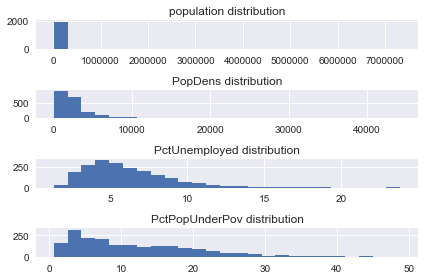

In [14]:
fig, ax = plt.subplots(len(paper_features))
for index, col in enumerate(paper_features):
    data = pd.Series(processed_df[col])
    ax[index].hist(data, bins=25)
    ax[index].set_title(str(col)+' distribution')
fig.tight_layout()
plt.show()

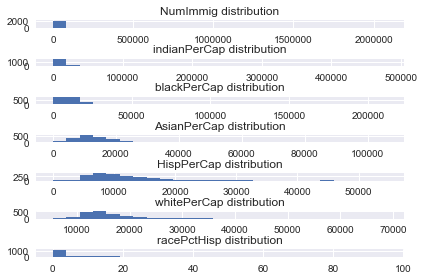

In [15]:
fig, ax = plt.subplots(len(biased_features))
for index, col in enumerate(biased_features):
    data = pd.Series(processed_df[col])
    ax[index].hist(data, bins=25)
    ax[index].set_title(str(col)+' distribution')
fig.tight_layout()
plt.subplots_adjust(hspace=4)
plt.show()

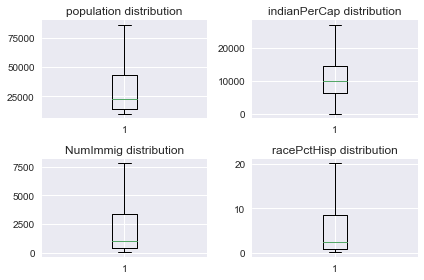

In [16]:
features_of_interest = ['population','NumImmig','indianPerCap','racePctHisp']

fig, ax = plt.subplots(2,2)
for index, col in enumerate(features_of_interest):
    if index < 2:
        row = 0
    else:
        row = 1
    data = pd.Series(processed_df[col])
    ax[index%2,row].boxplot(data, showfliers=False)
    ax[index%2,row].set_title(str(col)+' distribution')
fig.tight_layout()
plt.show()

- features of interest or population, indians per capita, number of immigrants, and percentage of hispanics had outliers which skewed their distributions
- features have varying length of min's and max's
- it may be advantageous to scale features 

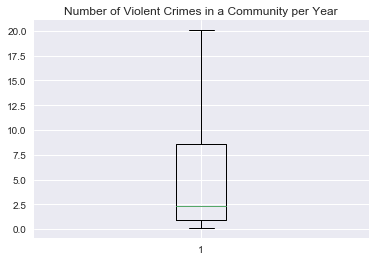

In [25]:
fig, ax = plt.subplots()
data = pd.Series(processed_df[col])
ax.boxplot(data, showfliers=False)
ax.set_title('Number of Violent Crimes in a Community per Year')
plt.show()

# Prediction vs Bias
- Using the feature groups, we can explore how accuracy can vary 
from one group of features to the next
- Considering some feature groups have more biased features than others,
we can determine how acccuracy varies with bias

We will use some of the most popular basic models to analyze the data

In [17]:
feature_groups = {'all_features':all_features,'top_features':top_features,'unbiased_top_features':unbiased_top_features,
                 'paper_features':paper_features}

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model

lm = linear_model.LinearRegression()

print('   Linear Model   ')
print('------------------')

for name, feature_group in feature_groups.items():
    X = preprocessing.normalize(processed_df[feature_group])
    print(name)
    scores = cross_val_score(lm, X, y, cv=5)
    print('  Acc: '+str(scores.mean()))

   Linear Model   
------------------
all_features
  Acc: 0.6031358660564282
top_features
  Acc: 0.5728195027351459
paper_features
  Acc: 0.05503070182134458
unbiased_top_features
  Acc: 0.5337834739178793


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree

dt = tree.DecisionTreeRegressor()

print('   Decision Tree   ')
print('-------------------')

for name, feature_group in feature_groups.items():
    X = preprocessing.scale(processed_df[feature_group])
    print(name)
    scores = cross_val_score(dt, X, y, cv=5)
    print('  Acc: '+str(scores.mean()))

   Decision Tree   
-------------------
all_features
  Acc: 0.25348134815823536
top_features
  Acc: 0.17415051316133467
paper_features
  Acc: -0.2021681563507133
unbiased_top_features
  Acc: 0.1864154668972114


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import neural_network

nn = neural_network.MLPRegressor()

print('   Neural Network   ')
print('--------------------')

for name, feature_group in feature_groups.items():
    X = processed_df[feature_group]
    print(name)
    scores = cross_val_score(nn, X, y, cv=5)
    print('  Mse: '+str(abs(scores).mean()))

   Neural Network   
--------------------
all_features
  Mse: 29.975012762346317
top_features
  Mse: 4.4383103091582665
paper_features
  Mse: 1.1240974480555668
unbiased_top_features
  Mse: 6.853046084266131


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import svm

svm = svm.LinearSVR()

print('   Support Vector Machine   ')
print('----------------------------')

for name, feature_group in feature_groups.items():
    X = processed_df[feature_group]
    print(name)
    scores = cross_val_score(svm, X, y, cv=5)
    print('  Mse: '+str(abs(scores).mean()))

   Support Vector Machine   
----------------------------
all_features
  Mse: 0.6030821639810258
top_features
  Mse: 4.208241330532745
paper_features
  Mse: 5.660786464915797
unbiased_top_features
  Mse: 9.217094037443783
